In [1]:
# Sigmoid Function

In [4]:
from math import e
def sigmoid(x):
    return 1/(1+e**-x)

In [7]:
sigmoid(100000)

1.0

In [8]:
sigmoid(0.100000)

0.52497918747894

In [9]:
import matplotlib.pyplot as plt

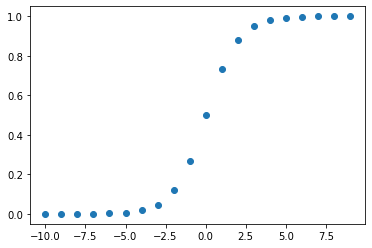

In [10]:
plt.scatter(range(-10,10),[sigmoid(i) for i in range(-10,10)])

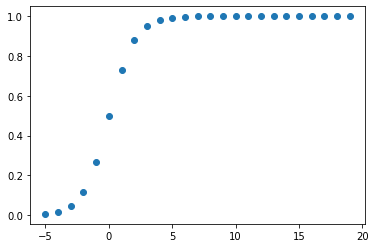

In [12]:
plt.scatter(range(-5,20),[sigmoid(i) for i in range(-5,20)])

In [13]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("Hands-on_ Dataset/heart1.csv")

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [17]:
df.shape

(303, 13)

In [18]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

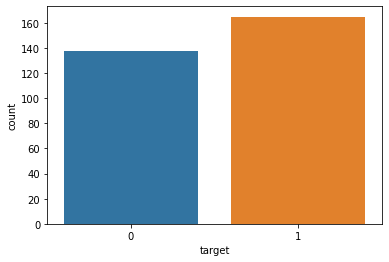

In [19]:
import seaborn as sns
sns.countplot(df.target)

In [20]:
# Split the data into features x and y

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [ ]:
# Split the data into train and test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()


In [30]:
lr.fit(X_train,y_train)

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Scaling
# Dummies
# outlier
# missing
# confusion matrix

In [31]:
y_pred = lr.predict(X_test)

In [32]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
lr.predict_proba(X_test)[:,-1]

array([0.0289191 , 0.83463496, 0.90867078, 0.04513163, 0.93011032,
       0.87979128, 0.56267903, 0.00335589, 0.00391318, 0.42553915,
       0.50717755, 0.13383654, 0.86622484, 0.06137353, 0.98388536,
       0.92748642, 0.98021888, 0.13606752, 0.0121242 , 0.00974152,
       0.81615783, 0.01991745, 0.13359366, 0.75008511, 0.92860632,
       0.79131065, 0.86117046, 0.49396205, 0.01456725, 0.91131062,
       0.06826193, 0.0563221 , 0.01165866, 0.06204183, 0.729306  ,
       0.12348652, 0.58241925, 0.82853514, 0.88205605, 0.78112272,
       0.44589498, 0.71730891, 0.7716164 , 0.64707333, 0.90261634,
       0.01129618, 0.26511389, 0.93231345, 0.03055617, 0.0423586 ,
       0.10795356, 0.01879233, 0.68385536, 0.97187926, 0.30615236,
       0.00317647, 0.08174894, 0.94971745, 0.02798272, 0.00662295,
       0.07166497])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [37]:
accuracy_score(y_test,y_pred)

0.8524590163934426

In [40]:
lr.coef_

array([[ 1.60901978e-04, -1.51876754e+00,  8.02268940e-01,
        -1.23484354e-02, -3.41968198e-03,  6.50163179e-02,
         4.75531142e-01,  2.09349906e-02, -1.00614385e+00,
        -6.34935219e-01,  6.16229578e-01, -7.69560383e-01]])

In [41]:
lr.intercept_

array([-0.01249703])

In [42]:
from sklearn.datasets import load_iris

In [43]:
data= load_iris()

In [46]:
x = pd.DataFrame(data = data.data,columns = data.feature_names)

In [51]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
y = pd.DataFrame(data.target,columns=['Target'])

In [50]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
lr2 = LogisticRegression()

In [57]:
lr.fit(X_train,y_train)

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
lr.predict_proba(X_test)

array([[3.78388569e-03, 8.27221035e-01, 1.68995079e-01],
       [9.46716076e-01, 5.32837243e-02, 2.00018685e-07],
       [8.72304084e-09, 1.55673057e-03, 9.98443261e-01],
       [6.43310691e-03, 7.92116534e-01, 2.01450359e-01],
       [1.44095197e-03, 7.74269058e-01, 2.24289990e-01],
       [9.55778272e-01, 4.42215507e-02, 1.76935768e-07],
       [7.76156365e-02, 9.08072100e-01, 1.43122632e-02],
       [1.61411592e-04, 1.55649315e-01, 8.44189274e-01],
       [2.20805041e-03, 7.62573947e-01, 2.35218003e-01],
       [2.83174009e-02, 9.45780967e-01, 2.59016326e-02],
       [4.39675988e-04, 2.43342190e-01, 7.56218134e-01],
       [9.68311906e-01, 3.16880155e-02, 7.81269419e-08],
       [9.72938803e-01, 2.70611637e-02, 3.33516316e-08],
       [9.62097400e-01, 3.79024893e-02, 1.10999757e-07],
       [9.79263670e-01, 2.07362656e-02, 6.47552337e-08],
       [4.54119901e-03, 7.12718781e-01, 2.82740020e-01],
       [7.22666781e-06, 2.42147142e-02, 9.75778059e-01],
       [2.73315239e-02, 9.47672

In [61]:
lr.predict([[3,4,2.3,2]])

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [62]:
lr.predict_proba([[3,4,2.3,2]])

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.79685996e-01, 2.01614726e-02, 1.52530971e-04]])

In [63]:
lr.predict([[-3,-4,2.3,2]])

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [64]:
lr.predict_proba([[-3,-4,2.3,2]])

C:\Users\AKASH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.04885517, 0.07051553, 0.8806293 ]])